# Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('StudentsPerformance.csv')

In [3]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [6]:
data.shape

(1000, 8)

In [7]:
data.size

8000

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


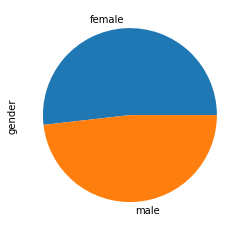

In [9]:
data['gender'].value_counts().plot(kind = 'pie')

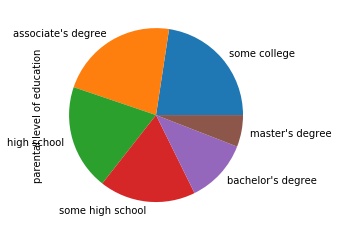

In [10]:
data['parental level of education'].value_counts().plot(kind = 'pie')

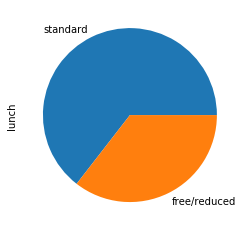

In [11]:
data['lunch'].value_counts().plot(kind = 'pie')

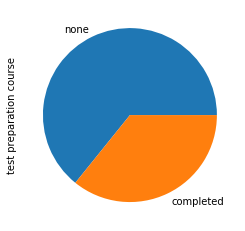

In [12]:
data['test preparation course'].value_counts().plot(kind = 'pie')

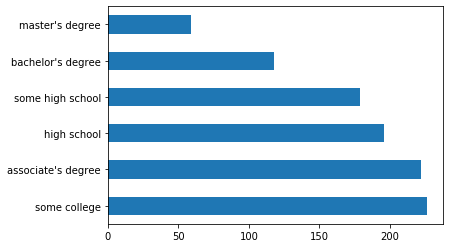

In [13]:
data['parental level of education'].value_counts().plot(kind='barh')

In [14]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

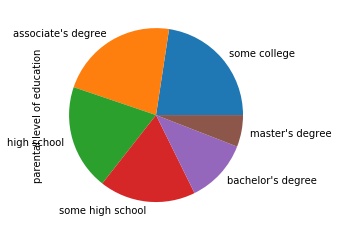

In [15]:
data['parental level of education'].value_counts().plot(kind='pie')

In [16]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [17]:
print(data['race/ethnicity'].unique())
print(data['parental level of education'].unique())
print(data['lunch'].unique())
print(data['test preparation course'].unique())

['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


In [18]:
gender = {'female': 0, 'male': 1}
race = dict(zip(data['race/ethnicity'].unique(), range(data['race/ethnicity'].nunique())))
parental = dict(zip(data['parental level of education'].unique(), range(data['parental level of education'].nunique())))
lunch = dict(zip(data['lunch'].unique(), range(data['lunch'].nunique())))
test = dict(zip(data['test preparation course'].unique(), range(data['test preparation course'].nunique())))
data['gender'] = [gender[x] for x in data['gender']]
data['race/ethnicity'] = [race[x] for x in data['race/ethnicity']]
data['parental level of education'] = [parental[x] for x in data['parental level of education']]
data['lunch'] = [lunch[x] for x in data['lunch']]
data['test preparation course'] = [test[x] for x in data['test preparation course']]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,0,0,0,0,72,72,74
1,0,1,1,0,1,69,90,88
2,0,0,2,0,0,90,95,93
3,1,2,3,1,0,47,57,44
4,1,1,1,0,0,76,78,75


In [19]:
data['mean score'] = data[['math score', 'reading score', 'writing score']].mean(axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,mean score
0,0,0,0,0,0,72,72,74,72.666667
1,0,1,1,0,1,69,90,88,82.333333
2,0,0,2,0,0,90,95,93,92.666667
3,1,2,3,1,0,47,57,44,49.333333
4,1,1,1,0,0,76,78,75,76.333333


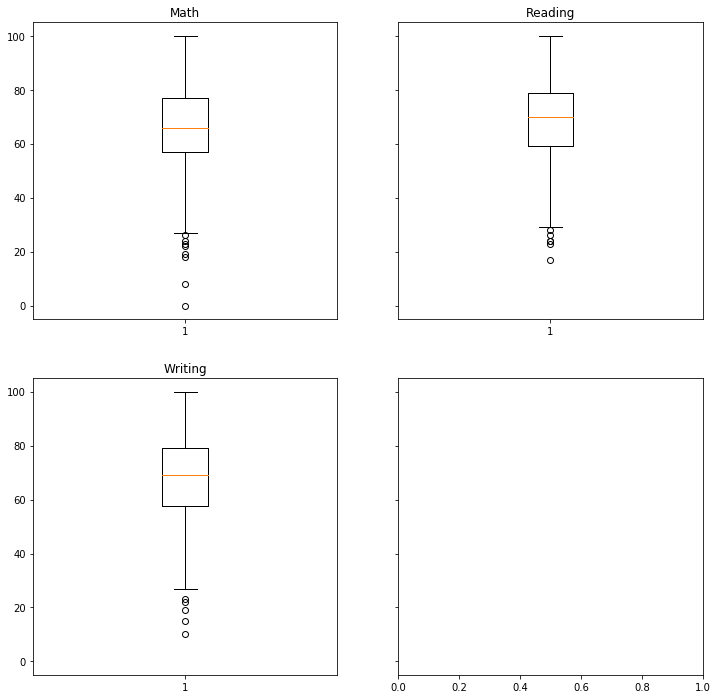

In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12), sharey=True)
axs[0, 0].boxplot(data['math score'])
axs[0, 0].set_title('Math')

axs[0, 1].boxplot(data['reading score'])
axs[0, 1].set_title('Reading')

axs[1, 0].boxplot(data['writing score'])
axs[1, 0].set_title('Writing')


plt.show()


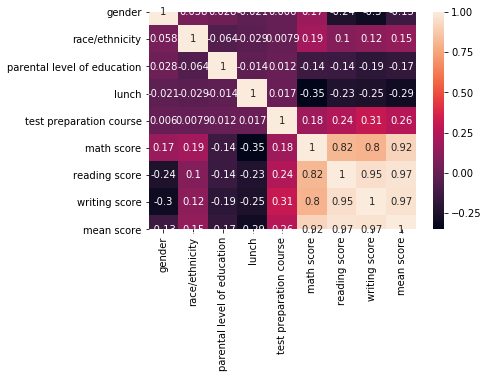

In [21]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


data = data.drop(['mean score'], axis=1)
x_train1, x_test1, y_train1, y_test1 = train_test_split(data, data['math score'], test_size=0.2, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data, data['reading score'], test_size=0.2, random_state=42)
x_train3, x_test3, y_train3, y_test3 = train_test_split(data, data['writing score'], test_size=0.2, random_state=42)
x_train1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
29,0,3,2,0,0,62,70,75
535,0,1,0,1,1,66,83,83
695,0,3,1,1,0,79,89,86
557,1,1,2,1,0,61,67,66
836,1,4,4,0,0,73,64,57


# for k = 3

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = [KNeighborsClassifier(n_neighbors=3)]
names = ['KNeighborsClassifier']
fit_models = []
for i in range(len(models)):
    model1 = models[i]
    model1.fit(x_train1, y_train1)
    model2 = models[i]
    model2.fit(x_train2, y_train2)
    model3 = models[i]
    model3.fit(x_train3, y_train3)
    
    pred1 = model1.predict(x_test1)
    pred2 = model2.predict(x_test2)
    pred3 = model3.predict(x_test3)
    
    fit_models.append([model1, model2, model3])
    
    print(names[i], '\n')
    print('Math score')
    print('MSE:', mean_squared_error(y_test1, pred1), '\nMAE:', mean_absolute_error(y_test1, pred1))
    print('Reading score')
    print('MSE:', mean_squared_error(y_test2, pred2), '\nMAE:', mean_absolute_error(y_test2, pred2))
    print('Writing score')
    print('MSE:', mean_squared_error(y_test3, pred3), '\nMAE:', mean_absolute_error(y_test3, pred3))
    print('\n')

KNeighborsClassifier 

Math score
MSE: 87.86 
MAE: 7.89
Reading score
MSE: 24.475 
MAE: 3.965
Writing score
MSE: 5.125 
MAE: 1.725




In [24]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train1, y_train1)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

normalized_models = []
for i in range(len(models)):
    model1 = make_pipeline(StandardScaler(), models[i])
    model1.fit(x_train1, y_train1)
    model2 = make_pipeline(StandardScaler(), models[i])
    model2.fit(x_train2, y_train2)
    model3 = make_pipeline(StandardScaler(), models[i])
    model3.fit(x_train3, y_train3)
    
    normalized_models.append([model1, model2, model3])
    
    print(names[i], '\n')
    print('Math score:', model1.score(x_test1, y_test1))
    print('Reading score:', model2.score(x_test2, y_test2))
    print('Writing score:', model3.score(x_test3, y_test3), '\n')


KNeighborsClassifier 

Math score: 0.03
Reading score: 0.035
Writing score: 0.065 



# for k = 2

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = [KNeighborsClassifier(n_neighbors=2)]
names = ['KNeighborsClassifier']
fit_models = []
for i in range(len(models)):
    model1 = models[i]
    model1.fit(x_train1, y_train1)
    model2 = models[i]
    model2.fit(x_train2, y_train2)
    model3 = models[i]
    model3.fit(x_train3, y_train3)
    
    pred1 = model1.predict(x_test1)
    pred2 = model2.predict(x_test2)
    pred3 = model3.predict(x_test3)
    
    fit_models.append([model1, model2, model3])
    
    print(names[i], '\n')
    print('Math score')
    print('MSE:', mean_squared_error(y_test1, pred1), '\nMAE:', mean_absolute_error(y_test1, pred1))
    print('Reading score')
    print('MSE:', mean_squared_error(y_test2, pred2), '\nMAE:', mean_absolute_error(y_test2, pred2))
    print('Writing score')
    print('MSE:', mean_squared_error(y_test3, pred3), '\nMAE:', mean_absolute_error(y_test3, pred3))
    print('\n')

KNeighborsClassifier 

Math score
MSE: 93.41 
MAE: 8.17
Reading score
MSE: 24.925 
MAE: 4.015
Writing score
MSE: 4.375 
MAE: 1.485




In [27]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train1, y_train1)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

normalized_models = []
for i in range(len(models)):
    model1 = make_pipeline(StandardScaler(), models[i])
    model1.fit(x_train1, y_train1)
    model2 = make_pipeline(StandardScaler(), models[i])
    model2.fit(x_train2, y_train2)
    model3 = make_pipeline(StandardScaler(), models[i])
    model3.fit(x_train3, y_train3)
    
    normalized_models.append([model1, model2, model3])
    
    print(names[i], '\n')
    print('Math score:', model1.score(x_test1, y_test1))
    print('Reading score:', model2.score(x_test2, y_test2))
    print('Writing score:', model3.score(x_test3, y_test3), '\n')


KNeighborsClassifier 

Math score: 0.03
Reading score: 0.08
Writing score: 0.065 



# for k = 5

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = [KNeighborsClassifier(n_neighbors=5)]
names = ['KNeighborsClassifier']
fit_models = []
for i in range(len(models)):
    model1 = models[i]
    model1.fit(x_train1, y_train1)
    model2 = models[i]
    model2.fit(x_train2, y_train2)
    model3 = models[i]
    model3.fit(x_train3, y_train3)
    
    pred1 = model1.predict(x_test1)
    pred2 = model2.predict(x_test2)
    pred3 = model3.predict(x_test3)
    
    fit_models.append([model1, model2, model3])
    
    print(names[i], '\n')
    print('Math score')
    print('MSE:', mean_squared_error(y_test1, pred1), '\nMAE:', mean_absolute_error(y_test1, pred1))
    print('Reading score')
    print('MSE:', mean_squared_error(y_test2, pred2), '\nMAE:', mean_absolute_error(y_test2, pred2))
    print('Writing score')
    print('MSE:', mean_squared_error(y_test3, pred3), '\nMAE:', mean_absolute_error(y_test3, pred3))
    print('\n')

KNeighborsClassifier 

Math score
MSE: 97.68 
MAE: 8.34
Reading score
MSE: 21.985 
MAE: 3.695
Writing score
MSE: 5.115 
MAE: 1.735




In [30]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train1, y_train1)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

normalized_models = []
for i in range(len(models)):
    model1 = make_pipeline(StandardScaler(), models[i])
    model1.fit(x_train1, y_train1)
    model2 = make_pipeline(StandardScaler(), models[i])
    model2.fit(x_train2, y_train2)
    model3 = make_pipeline(StandardScaler(), models[i])
    model3.fit(x_train3, y_train3)
    
    normalized_models.append([model1, model2, model3])
    
    print(names[i], '\n')
    print('Math score:', model1.score(x_test1, y_test1))
    print('Reading score:', model2.score(x_test2, y_test2))
    print('Writing score:', model3.score(x_test3, y_test3), '\n')


KNeighborsClassifier 

Math score: 0.03
Reading score: 0.04
Writing score: 0.07 



In [32]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(x_train1, y_train1)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

models = [LinearRegression(), RandomForestRegressor()]
names = ['Linear regression', 'Random forest']
fit_models = []
for i in range(len(models)):
    model1 = models[i]
    model1.fit(x_train1, y_train1)
    model2 = models[i]
    model2.fit(x_train2, y_train2)
   
    
    pred1 = model1.predict(x_test1)
    pred2 = model2.predict(x_test2)
   
    fit_models.append([model1, model2])
    
    print(names[i], '\n')
    print('Math score')
    print('MSE:', mean_squared_error(y_test1, pred1), '\nMAE:', mean_absolute_error(y_test1, pred1))
    print('Reading score')
    print('MSE:', mean_squared_error(y_test2, pred2), '\nMAE:', mean_absolute_error(y_test2, pred2))
    print('Writing score')
   

Linear regression 

Math score
MSE: 92.295 
MAE: 7.875
Reading score
MSE: 2.824753129415399e-28 
MAE: 1.2541079286165768e-14
Writing score
Random forest 

Math score
MSE: 93.5727 
MAE: 7.896
Reading score
MSE: 0.29269999999999996 
MAE: 0.075
Writing score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

normalized_models = []
for i in range(len(models)):
    model1 = make_pipeline(StandardScaler(), models[i])
    model1.fit(x_train1, y_train1)
    model2 = make_pipeline(StandardScaler(), models[i])
    model2.fit(x_train2, y_train2)
   
    
    normalized_models.append([model1, model2, model3])
    
    print(names[i], '\n')
    print('Math score:', model1.score(x_test1, y_test1))
    print('Reading score:', model2.score(x_test2, y_test2))
    print('Writing score:', model3.score(x_test3, y_test3), '\n')


Linear regression 

Math score: 0.6207133769269461
Reading score: 1.0
Writing score: 0.065 

Random forest 

Math score: 0.6161978545104267
Reading score: 0.9984850920440265
Writing score: 0.065 



In [35]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test1)
cm = confusion_matrix(y_test1, pred1)
cm


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

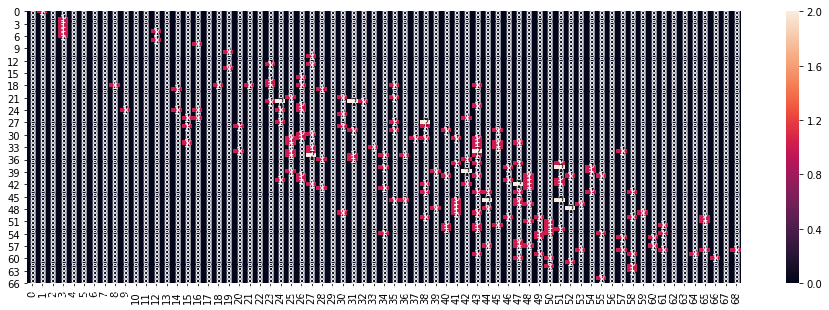

In [36]:
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot=True)


In [37]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test2)
cm = confusion_matrix(y_test2, pred2)
cm


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

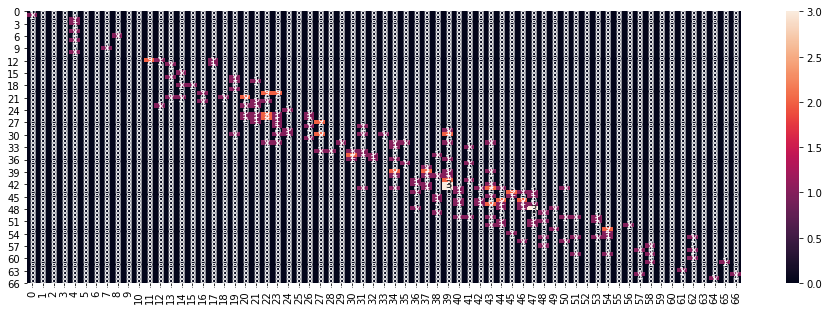

In [38]:
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot=True)

In [39]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test3)
cm = confusion_matrix(y_test3, pred3)
cm

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

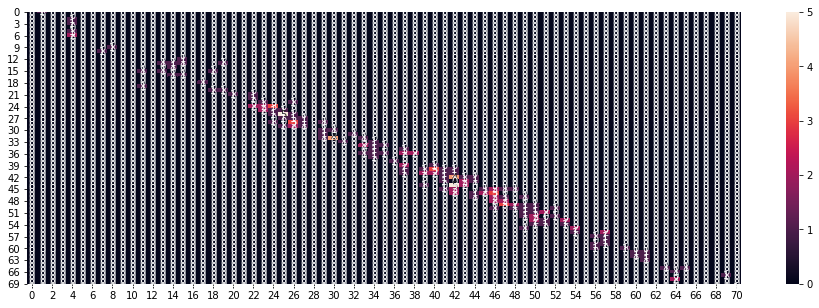

In [40]:
plt.figure(figsize = (16,5))
sns.heatmap(cm, annot=True)